In [1]:
from datetime import date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Context

## Functions

### Fix dataset errors

In [2]:
def fix_row(row):
    """
    Corrects a row by shifting specified columns to the right and splitting the 'title' column
    to separate the title and author.

    This function addresses a data error where the 'title' column contains both the title and 
    author separated by a semicolon, and the values in other columns need to be shifted to the right.

    Args:
        row (pandas.Series): The row of the DataFrame to be corrected.

    Returns:
        pandas.Series: The corrected row with values shifted and the 'title' and 'author' columns fixed.
    """
    
    # Shift values to the right
    for col in ['image-url-l', 'image-url-m', 'image-url-s', 'publisher', 'publication_year']:
        row[col] = row.shift(1)[col]
        
    title_author_split = row['title'].split(';')
    row['title'] = title_author_split[0][:-2]
    row['author'] = title_author_split[1][:-1]
    return row

### EDA

In [3]:
def plot_value_counts_distribution(data, column, ax=None, figsize=(12, 6)):
    """
    Plots the distribution of the number of unique values occurrences in a column.

    Args:
        data (DataFrame): The input DataFrame containing the data.
        column (str): The name of the column for which to plot the distribution.
        ax (matplotlib.axes._subplots.AxesSubplot, optional): The axes on which to plot. If not provided, a new figure will be created.
        figsize (tuple, optional): The size of the figure (width, height). Used when ax=None. Default is (12, 6).
        
    Returns:
        None: Displays the bar plot using matplotlib and seaborn.
    """
    
    # Get the value counts for the specified column
    value_counts = data[column].value_counts()

    # Count the occurrences of each frequency
    frequency_counts = value_counts.value_counts().sort_index()

    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()

    sns.barplot(x=frequency_counts.index, y=frequency_counts.values, color='blue', ax=ax)

    ax.set_xlabel('Number of Occurrences')
    ax.set_ylabel('Number of Unique Values')
    ax.set_title(f'Distribution of Occurrences for {column}')

#### Top n categories - vertical barplot

In [4]:
def add_annotations(ax, total, precision=1, percentage=True):
    """
    Adds percentage annotation to all countplot columns.
    
    Args:
        ax (matplotlib.axes._axes.Axes): Axes on which the countplot is built.
        total(int): Dataframe length/total number of records in the dataset.
        precision (int, optional): The precision (number of decimal places) with which the percentages of each class will be displayed.
        percentage (boolean, optional): Display percentage or count (default - percentage).  
        
    Returns:
        None: Adds anotation.
    """
    
    for p in ax.patches:
        height = p.get_height()
        text = f'{height/total:.{precision}%}' if percentage else f'{int(height)}'
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.01,
                text,
                ha="center")

In [6]:
def plot_top_n_categories(data, column, n=5, ax=None, precision=1, percentage=True, figsize=(10, 6), title=None, palette="viridis"):
    """
    Plots a bar plot of the top N most frequent categories in a specified column along with their percentages.

    Args:
        data (DataFrame): The input DataFrame containing the data.
        column (str): The name of the categorical column for which the top categories will be plotted.
        n (int, optional): The number of top categories to display. Default is 5.
        ax (matplotlib.axes.Axes, optional): The axis on which to draw the plot. If not provided, a new plot will be created.
        precision (int, optional): The precision (number of decimal places) with which the percentages of each class will be displayed.
        figsize (tuple, optional): The size of the figure (width, height). Used when ax=None. Default is (10, 6).
        title (str, optional): The title of the bar plot. Default is None.
        palette (str, optional): The color palette to use for the bars. Default is "viridis".
        
    Returns:
        None: Displays the bar plot using matplotlib and seaborn.
    """
    
    # Get the top N categories based on frequency
    top_n_categories = data[column].value_counts().nlargest(n)

    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()

    sns.barplot(x=top_n_categories.index, y=top_n_categories.values, ax=ax, palette=palette)

    # Add percentage annotations
    add_annotations(ax=ax, total=len(data), precision=precision, percentage=percentage)

    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(title)
    if title is None:
        ax.set_title(f'Top {n} Categories in {column}')
    if ax is None:
        plt.show()

#### Top n categories - horizontal barplot

In [7]:
def add_annotations_hor(ax, total, precision=1, percentage=True):
    """
    Adds percentage annotation to all countplot horizontal bars.
    
    Args:
        ax (matplotlib.axes._axes.Axes): Axes on which the countplot is built.
        total(int): Dataframe length/total number of records in the dataset.
        precision (int, optional): The precision (number of decimal places) with which the percentages of each class will be displayed.
        percentage (boolean, optional): Display percentage or count (default - percentage).  
        
    Returns:
        None: Adds annotation.
    """
    
    for p in ax.patches:
        width = p.get_width()
        text = f'{width/total:.{precision}%}' if percentage else f'{int(width)}'
        ax.text(width + 0.01,
                p.get_y() + p.get_height() / 2.,
                text,
                va="center")

In [8]:
def plot_top_n_categories_hor(data, column, n=5, ax=None, precision=1, percentage=True, figsize=(10, 6), title=None, palette="viridis"):
    """
    Plots a horizontal bar plot of the top N most frequent categories in a specified column along with their percentages.

    Args:
        data (DataFrame): The input DataFrame containing the data.
        column (str): The name of the categorical column for which the top categories will be plotted.
        n (int, optional): The number of top categories to display. Default is 5.
        ax (matplotlib.axes.Axes, optional): The axis on which to draw the plot. If not provided, a new plot will be created.
        precision (int, optional): The precision (number of decimal places) with which the percentages of each class will be displayed.
        figsize (tuple, optional): The size of the figure (width, height). Used when ax=None. Default is (10, 6).
        title (str, optional): The title of the bar plot. Default is None.
        palette (str, optional): The color palette to use for the bars. Default is "viridis".

    Returns:
        None: Displays the bar plot using matplotlib and seaborn.
    """
    
    # Get the top N categories based on frequency
    top_n_categories = data[column].value_counts().nlargest(n)

    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()

    sns.barplot(y=top_n_categories.index, x=top_n_categories.values, ax=ax, orient='h', palette=palette)

    # Add percentage annotations
    add_annotations_hor(ax=ax, total=len(data), precision=precision, percentage=percentage)

    ax.set_ylabel(column)
    ax.set_xlabel('Count')
    ax.set_title(title)
    if title is None:
        ax.set_title(f'Top {n} Categories in {column}')
        
    if ax is None:
        plt.show()

## Read the datasets, view several records and rename columns

In [6]:
books_df = pd.read_csv('../data/original_data/Books.csv')
users_df = pd.read_csv('../data/original_data/Users.csv')
ratings_df = pd.read_csv('../data/original_data/Ratings.csv')

print(f"books_df.shape = {books_df.shape}")
print(f"users_df.shape = {users_df.shape}")
print(f"ratings_df.shape = {ratings_df.shape}")

books_df.shape = (271360, 8)
users_df.shape = (278858, 3)
ratings_df.shape = (1149780, 3)


### books_df

In [7]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [8]:
books_df.tail(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


#### Rename columns

Since the column names available in the dataframe are quite long, it will be inconvenient to access them in the program, so it was decided to rename the columns using the 'snake_case' naming convention. Also, the names of some columns were shortened.

In [9]:
books_df.rename(
    columns = {
        "ISBN": "ISBN".lower(),
        "Book-Title": "title",
        "Book-Author": "author",
        "Year-Of-Publication": "publication_year",
        "Publisher": "Publisher".lower(),
        "Image-URL-S": "Image-URL-S".lower(),
        "Image-URL-M": "Image-URL-M".lower(),
        "Image-URL-L": "Image-URL-L".lower()
    }, 
    inplace=True
)
books_df.head(3)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


### users_df

In [10]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [11]:
users_df.tail(3)

,User-ID,Location,Age
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [12]:
users_df.rename(
    columns = {
        "User-ID": "user_id",
        "Location": "Location".lower(),
        "Age": "Age".lower()
    },
    inplace = True
)
users_df.head(3)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


### ratings_df

In [13]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [14]:
ratings_df.tail(3)

,User-ID,ISBN,Book-Rating
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [15]:
ratings_df.rename(
    columns = {
        "User-ID": "user_id",
        "ISBN": "ISBN".lower(),
        "Book-Rating": "rating"
    },
    inplace = True
)
ratings_df.head(3)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


# Data quality assessment

## Missing data examination

### Determine the number of missing values for each column

#### books_df

In [16]:
print(f"books_df.shape = {books_df.shape}")
books_df.info()

books_df.shape = (271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   isbn              271360 non-null  object
 1   title             271360 non-null  object
 2   author            271358 non-null  object
 3   publication_year  271360 non-null  object
 4   publisher         271358 non-null  object
 5   image-url-s       271360 non-null  object
 6   image-url-m       271360 non-null  object
 7   image-url-l       271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [17]:
missing_info_df = pd.DataFrame({
    'missing_count': books_df.isnull().sum(),
    'missing_percentage': (books_df.isnull().sum() / len(books_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,isbn,0,0.000000
1,title,0,0.000000
2,author,2,0.000737
3,publication_year,0,0.000000
4,publisher,2,0.000737
5,image-url-s,0,0.000000
6,image-url-m,0,0.000000
7,image-url-l,3,0.001106


##### Fill NaN values for 'author' column 

In [18]:
books_df[books_df['author'].isnull()]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


<img src="books_dataset_EDA_images/fillna_books_A_quiz_masters.png">

In [19]:
books_df.loc[118033, 'author'] = 'Unknown'

<img src="books_dataset_EDA_images/fillna_books_The_Credit_Suisse_Guide.png">

In [20]:
books_df[books_df['author'].str.contains('Larissa Anne', case=False, na=False)]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l


In [21]:
books_df.loc[187689, 'author'] = 'Downes, Larissa Anne'

In [22]:
books_df[books_df['author'].isnull()]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l


In [23]:
books_df[books_df['isbn'].apply(lambda x: x in ['0751352497', '9627982032'])]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
118033,0751352497,A+ Quiz Masters:01 Earth,Unknown,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,"Downes, Larissa Anne",1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


#### users_df

In [24]:
print(f"users_df.shape = {users_df.shape}")
users_df.info()

users_df.shape = (278858, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
missing_info_df = pd.DataFrame({
    'missing_count': users_df.isnull().sum(),
    'missing_percentage': (users_df.isnull().sum() / len(users_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,user_id,0,0.000000
1,location,0,0.000000
2,age,110762,39.719857


Given the fact that the 'age' column contains ~40% missing values and is not intended to be used to build a recommendation model, it can be removed from the dataset.

#### ratings_df

In [26]:
print(f"ratings_df.shape = {ratings_df.shape}")
ratings_df.info()

ratings_df.shape = (1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [27]:
missing_info_df = pd.DataFrame({
    'missing_count': ratings_df.isnull().sum(),
    'missing_percentage': (ratings_df.isnull().sum() / len(ratings_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,user_id,0,0.0
1,isbn,0,0.0
2,rating,0,0.0


## Explore the data type and contents of each field

### Assess data type of each field

#### books_df

In [28]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   isbn              271360 non-null  object
 1   title             271360 non-null  object
 2   author            271360 non-null  object
 3   publication_year  271360 non-null  object
 4   publisher         271358 non-null  object
 5   image-url-s       271360 non-null  object
 6   image-url-m       271360 non-null  object
 7   image-url-l       271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [29]:
for column in books_df.select_dtypes(include='object').columns:
    column_type = type(books_df[column].iloc[0])
    print(f"type({column}) = {column_type}")
    
    all_entries_are_same_type = books_df[column].apply(lambda x: isinstance(x, column_type)).all()
    print(f"All entries of the column {column} have the type {column_type}: {all_entries_are_same_type}")
    
    if all_entries_are_same_type == False:
        all_entries_non_null_are_same_type = books_df[books_df[column].isnull() == False][column].apply(lambda x: isinstance(x, column_type)).all()
        print(f"All non-null entries of the column {column} have the type {column_type}: {all_entries_non_null_are_same_type}")
    print("")

type(isbn) = <class 'str'>
All entries of the column isbn have the type <class 'str'>: True

type(title) = <class 'str'>
All entries of the column title have the type <class 'str'>: True

type(author) = <class 'str'>
All entries of the column author have the type <class 'str'>: True

type(publication_year) = <class 'int'>
All entries of the column publication_year have the type <class 'int'>: False
All non-null entries of the column publication_year have the type <class 'int'>: False

type(publisher) = <class 'str'>
All entries of the column publisher have the type <class 'str'>: False
All non-null entries of the column publisher have the type <class 'str'>: True

type(image-url-s) = <class 'str'>
All entries of the column image-url-s have the type <class 'str'>: True

type(image-url-m) = <class 'str'>
All entries of the column image-url-m have the type <class 'str'>: True

type(image-url-l) = <class 'str'>
All entries of the column image-url-l have the type <class 'str'>: False
All no

The obtained results show that all fields have object data type.  
For the **'publication_year'** column, it would be more appropriate to make the **int** data type rather than **object (str)**.  
For the other columns, the results are as expected because each of them stores string information.

##### Explore 'publication_year' column

Let's consider the problem with the records of the 'Year-Of-Publication' column (why not all non-null entries of this column have the type 'int').

In [30]:
books_df.shape

(271360, 8)

In [31]:
books_df[books_df['publication_year'].apply(lambda x: isinstance(x, int) == False)]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
196608,0425176967,Self-Portrait With Ghosts,Kelly Dwyer,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176967.0...,http://images.amazon.com/images/P/0425176967.0...,http://images.amazon.com/images/P/0425176967.0...
196609,0373239971,Baby'S First Christmas (The Baby Of The Month ...,Marie Ferrarella,1995,Silhouette,http://images.amazon.com/images/P/0373239971.0...,http://images.amazon.com/images/P/0373239971.0...,http://images.amazon.com/images/P/0373239971.0...
196610,0373201613,Man She Married (By Request) (By Request),Ann Major,1999,Harlequin,http://images.amazon.com/images/P/0373201613.0...,http://images.amazon.com/images/P/0373201613.0...,http://images.amazon.com/images/P/0373201613.0...
196611,159071024X,The Gilded Chamber,Rebecca Kohn,2004,Rugged Land,http://images.amazon.com/images/P/159071024X.0...,http://images.amazon.com/images/P/159071024X.0...,http://images.amazon.com/images/P/159071024X.0...
196612,0066210747,The Bielski Brothers: The True Story of Three ...,Peter Duffy,2003,HarperCollins,http://images.amazon.com/images/P/0066210747.0...,http://images.amazon.com/images/P/0066210747.0...,http://images.amazon.com/images/P/0066210747.0...
...,...,...,...,...,...,...,...,...
262139,0897332032,"The Age of Agony: The Art of Healing, 1700-1800",Guy R. Williams,1986,Academy Chicago Publishers,http://images.amazon.com/images/P/0897332032.0...,http://images.amazon.com/images/P/0897332032.0...,http://images.amazon.com/images/P/0897332032.0...
262140,0897332857,The Age of Miracles,Guy Williams,1987,Academy Chicago Publishers,http://images.amazon.com/images/P/0897332857.0...,http://images.amazon.com/images/P/0897332857.0...,http://images.amazon.com/images/P/0897332857.0...
262141,0897333918,The Common Stream: Two Thousand Years of the E...,Rowland Parker,1994,Academy Chicago Publishers,http://images.amazon.com/images/P/0897333918.0...,http://images.amazon.com/images/P/0897333918.0...,http://images.amazon.com/images/P/0897333918.0...
262142,0906540631,The Essene Odyssey: The Mystery of the True Te...,Hugh J. Schonfield,1993,Element Books,http://images.amazon.com/images/P/0906540631.0...,http://images.amazon.com/images/P/0906540631.0...,http://images.amazon.com/images/P/0906540631.0...


From the output, we can see that some records contain an int value for the 'publication_year' column, but have a data type of str.  
Before casting the 'publication_year' column to type int, we need to check that all records contain numeric values in that column.

In [39]:
# Convert the 'publication_year' column to strings
books_df['publication_year'] = books_df['publication_year'].astype(str)

# Identify records where 'publication_year' is not an integer
non_integer_records = books_df[~books_df['publication_year'].str.isdigit()]
print(f"len(non_integer_records) = {len(non_integer_records)}")

len(non_integer_records) = 3


In [40]:
non_integer_records

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [41]:
for index, row in non_integer_records.iterrows():
    print(f"{index}) isbn={row['isbn']}; title={row['title']}")

209538) isbn=078946697X; title=DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
220731) isbn=2070426769; title=Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
221678) isbn=0789466953; title=DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"


From the obtained results, it can be concluded that the dataset contains errors (for 3 records, 'title' and 'author' are separated by the sign ';', not ',').  
Therefore, the 'title' column for these records contains both the title of the book and its author.

In [42]:
non_integer_records = non_integer_records.apply(fix_row, axis=1)
non_integer_records

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [43]:
for index, row in non_integer_records.iterrows():
    print(f"{index}) isbn={row['isbn']}; title={row['title']}")

209538) isbn=078946697X; title=DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
220731) isbn=2070426769; title=Peuple du ciel, suivi de 'Les Bergers
221678) isbn=0789466953; title=DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)


In [44]:
error_indices = non_integer_records.index
error_indices

Index([209538, 220731, 221678], dtype='int64')

In [45]:
books_df.loc[error_indices] = books_df.loc[error_indices].apply(fix_row, axis=1)

# Identify records where 'publication_year' is not an integer
non_integer_records = books_df[~books_df['publication_year'].str.isdigit()]
print(f"len(non_integer_records) = {len(non_integer_records)}")

len(non_integer_records) = 0


In [48]:
books_df.head(3)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [49]:
books_df.loc[error_indices]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


From the obtained results, it can be assumed that all values ​​of the column 'publication_year' can now be cast to the data type int.

In [46]:
books_df['publication_year'] = books_df['publication_year'].astype(int)
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   isbn              271360 non-null  object
 1   title             271360 non-null  object
 2   author            271360 non-null  object
 3   publication_year  271360 non-null  int32 
 4   publisher         271358 non-null  object
 5   image-url-s       271360 non-null  object
 6   image-url-m       271360 non-null  object
 7   image-url-l       271360 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


In [47]:
missing_info_df = pd.DataFrame({
    'missing_count': books_df.isnull().sum(),
    'missing_percentage': (books_df.isnull().sum() / len(books_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,isbn,0,0.000000
1,title,0,0.000000
2,author,0,0.000000
3,publication_year,0,0.000000
4,publisher,2,0.000737
5,image-url-s,0,0.000000
6,image-url-m,0,0.000000
7,image-url-l,0,0.000000


The results show that solving the problem with the 'publication_year' column also solved the problem with the missing values of the 'image-url-l' column.

#### users_df

In [50]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### ratings_df

In [51]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Check for duplication

#### books_df

In [52]:
print(f"books_df.shape = {books_df.shape}")
books_df.nunique()

books_df.shape = (271360, 8)


isbn                271360
title               242135
author              102021
publication_year       116
publisher            16804
image-url-s         271044
image-url-m         271044
image-url-l         271044
dtype: int64

From the obtained results it can be concluded that:
1) The dataset contains books that have the same title but different ISBNs.
2) For some books, the cover image is missing.
3) Since each record is characterized by a unique ISBN value, it could be set as a dataframe index. However, in the future, this column will be used to join dataframes, so making it a dataframe index makes no sense.

#### users_df

In [53]:
print(f"users_df.shape = {users_df.shape}")
users_df.nunique()

users_df.shape = (278858, 3)


user_id     278858
location     57339
age            165
dtype: int64

Since each record in the users_df is characterized by a unique 'User-ID' value, it could be set as a dataframe index.  
However, in the future, this column will be used to join dataframes, so making it a dataframe index makes no sense.

#### ratings_df 

In [54]:
print(f"ratings_df.shape = {ratings_df.shape}")
ratings_df.nunique()

ratings_df.shape = (1149780, 3)


user_id    105283
isbn       340556
rating         11
dtype: int64

The obtained results show that:
1) The number of unique 'User-ID's in ratings_df is smaller than in users_df. This means that not all users rated the books.
2) The number of unique ISBNs in ratings_df is greater than in users_df. This means that the rating_df dataframe contains information about books that is not in books_df.

### Analyse statistics summary

#### books_df

In [55]:
books_df.describe(include='all')

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
count,271360,271360,271360,271360.000000,271358,271360,271360,271360
unique,271360,242135,102021,NaN,16804,271044,271044,271044
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...
freq,1,27,632,NaN,7535,2,2,2
mean,NaN,NaN,NaN,1959.761273,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,257.992836,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


The following conclusions can be drawn from the obtained results:
1) The fact that the title 'Selected Poems' appears 27 times in the books_df dataframe confirms the fact that it contains books with the same title but different ISBNs.
2) The largest number of books in the dataset is by Agatha Christie (632 books).
3) The fact that a certain URL occurs 2 times may indicate the presence of duplicates or errors in the dataset, since each book should have an individual cover image.
4) For the 'publication_year' column, the minimum value is 0 and the maximum value is 2050, which exceeds the current year of 2024. This indicates that there are errors in this column of the dataset.

##### Fix errors in column 'publication_year'

In [26]:
print(
    f"len(books_df[(books_df['publication_year'] < 1900) | (books_df['publication_year'] > date.today().year)]) = "
    + f"{len(books_df[(books_df['publication_year'] < 1900) | (books_df['publication_year'] > date.today().year)])}"
)

print(f"len(books_df[books_df['publication_year'] < 1900) = {len(books_df[books_df['publication_year'] < 1900])}")
print(f"len(books_df[books_df['publication_year'] == 0) = {len(books_df[books_df['publication_year'] == 0])}")
print(f"len(books_df[books_df['publication_year'] > date.today().year]) = {len(books_df[books_df['publication_year'] > date.today().year])}")

len(books_df[(books_df['publication_year'] < 1900) | (books_df['publication_year'] > date.today().year)]) = 4634
len(books_df[books_df['publication_year'] < 1900) = 4622
len(books_df[books_df['publication_year'] == 0) = 4618
len(books_df[books_df['publication_year'] > date.today().year]) = 12


Since there are a lot of entries with publication_year == 0 (4618), it will take a long time to fix them.  
However, it is possible to correct data about books in which the year of publication is in the future (publication_year > current_year).

In [27]:
books_df[books_df['publication_year'] > date.today().year]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [28]:
# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books_df.loc[37487, 'author'] = 'Bruce Coville'

#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books_df.loc[37487, 'publication_year'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books_df.loc[55676, 'publication_year'] = 2005

# Crossing America
books_df.loc[78168, 'publication_year'] = 2001

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books_df.loc[80264, 'publication_year'] = 2003

# Outline of European Architecture (Pelican S.)
books_df.loc[97826, 'publication_year'] = 1981

# Three Plays of Eugene Oneill
books_df.loc[116053, 'publication_year'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books_df.loc[118294, 'publication_year'] = 2023

# 'Field Guide to the Birds of North America, 3rd Ed.'
books_df.loc[192993, 'publication_year'] = 2003

# FOREST PEOPLE (Touchstone Books (Hardcover))
books_df.loc[228173, 'publication_year'] = 1987

# In Our Time: Stories (Scribner Classic)
books_df.loc[240169, 'publication_year'] = 1996

# CLOUT
books_df.loc[246842, 'publication_year'] = 1925

# To Have and Have Not
books_df.loc[255409, 'publication_year'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books_df.loc[260974, 'publication_year'] = 1991

In [29]:
books_df[books_df['publication_year'] > date.today().year]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l


In [62]:
books_df[books_df['publication_year'] != 0].describe(include='all')

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
count,266742,266742,266742,266742.000000,266740,266742,266742,266742
unique,266742,238514,100667,NaN,16394,266433,266433,266433
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/156389551X.0...,http://images.amazon.com/images/P/156389551X.0...,http://images.amazon.com/images/P/156389551X.0...
freq,1,27,598,NaN,7535,2,2,2
mean,NaN,NaN,NaN,1993.687616,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.323099,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1376.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1996.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


#### users_df

In [56]:
users_df.describe(include='all')

,user_id,location,age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


#### ratings_df

In [57]:
ratings_df.describe(include='all')

,user_id,isbn,rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


The obtained results show that:
1) The value of the 'rating' column varies in the range \[0; 10].
2) The average value of the 'Book-Rating' column is ~2.87/10, which indicates that users mostly gave poor ratings to the books they read.

# Data exploration

### Read datasets and check if the correct datasets were read

In [10]:
books_df = pd.read_csv('../../data/processed_data/Books.csv')
users_df = pd.read_csv('../../data/processed_data/Users.csv')
ratings_df = pd.read_csv('../../data/processed_data/Ratings.csv')

print(f"books_df.shape = {books_df.shape}")
print(f"users_df.shape = {users_df.shape}")
print(f"ratings_df.shape = {ratings_df.shape}")

books_df.shape = (271360, 8)
users_df.shape = (278858, 3)
ratings_df.shape = (1149780, 3)


In [11]:
missing_info_df = pd.DataFrame({
    'missing_count': books_df.isnull().sum(),
    'missing_percentage': (books_df.isnull().sum() / len(books_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

# author - 0, image-url-l - 0
missing_info_df

,column,missing_count,missing_percentage
0,isbn,0,0.000000
1,title,0,0.000000
2,author,0,0.000000
3,publication_year,0,0.000000
4,publisher,2,0.000737
5,image-url-s,0,0.000000
6,image-url-m,0,0.000000
7,image-url-l,0,0.000000


In [12]:
# Should be zero records
books_df[books_df['publication_year'] > date.today().year]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l


## EDA Univariate Analysis

### books_df

In [13]:
books_df.head(3)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


#### Analyse categorical columns

##### 'author' column

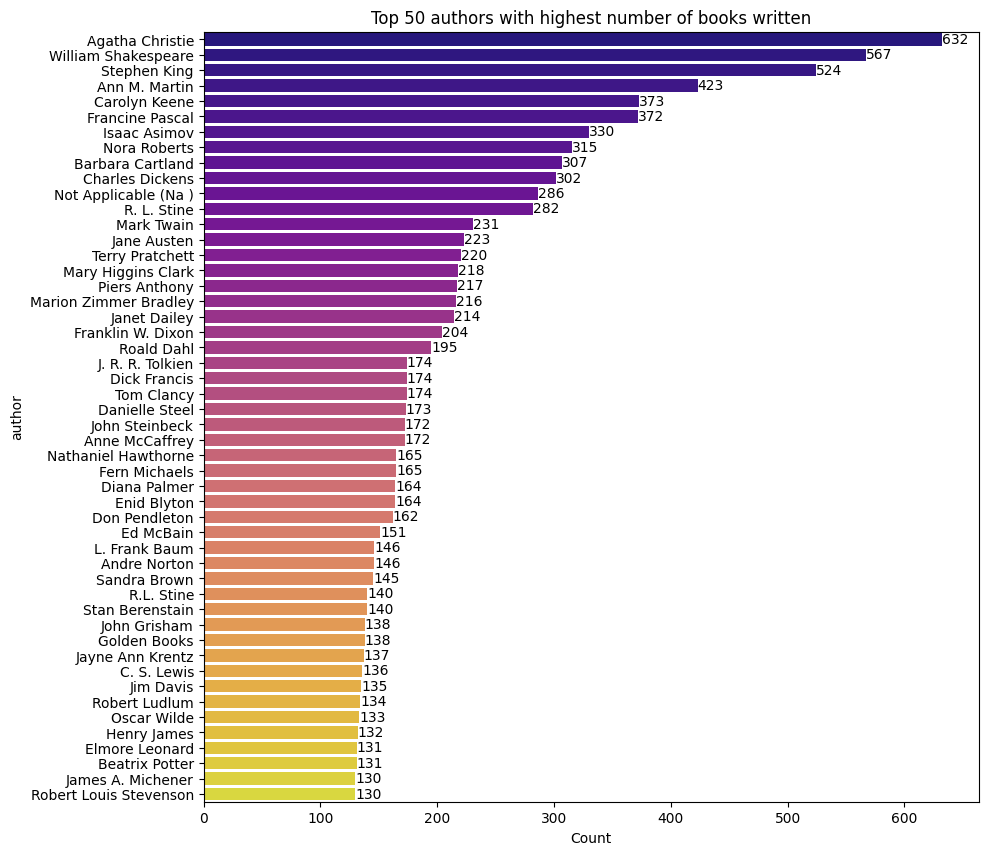

In [97]:
n_categories = 50
title = f"Top {n_categories} authors with highest number of books written"
plot_top_n_categories_hor(books_df, 'author', n=n_categories, percentage=False, title=title, palette='plasma', figsize=(10, 10))

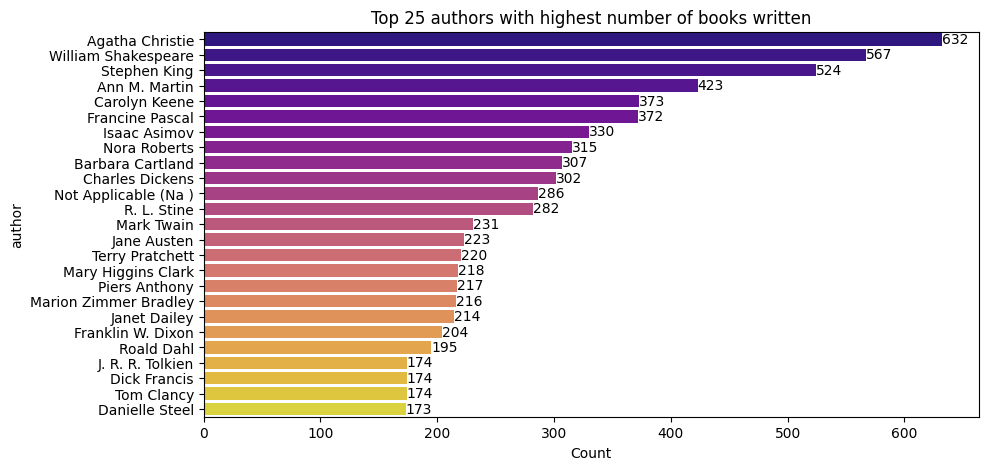

In [18]:
n_categories = 25
title = f"Top {n_categories} authors with highest number of books written"
plot_top_n_categories_hor(books_df, 'author', n=n_categories, percentage=False, title=title, palette='plasma', figsize=(10, 5))

The following conclusions can be drawn from the obtained results:
1) As already mentioned earlier, the most books, among those available in the dataset, were written by the author Agatha Christie - 632 books.
2) The top 3 authors with the largest number of books written - Agatha Christie, William Shakespeare and Stephen King wrote more than 500 books each.
3) The top 10 authors with the most books written have written more than 300 books each.

##### 'publisher' column

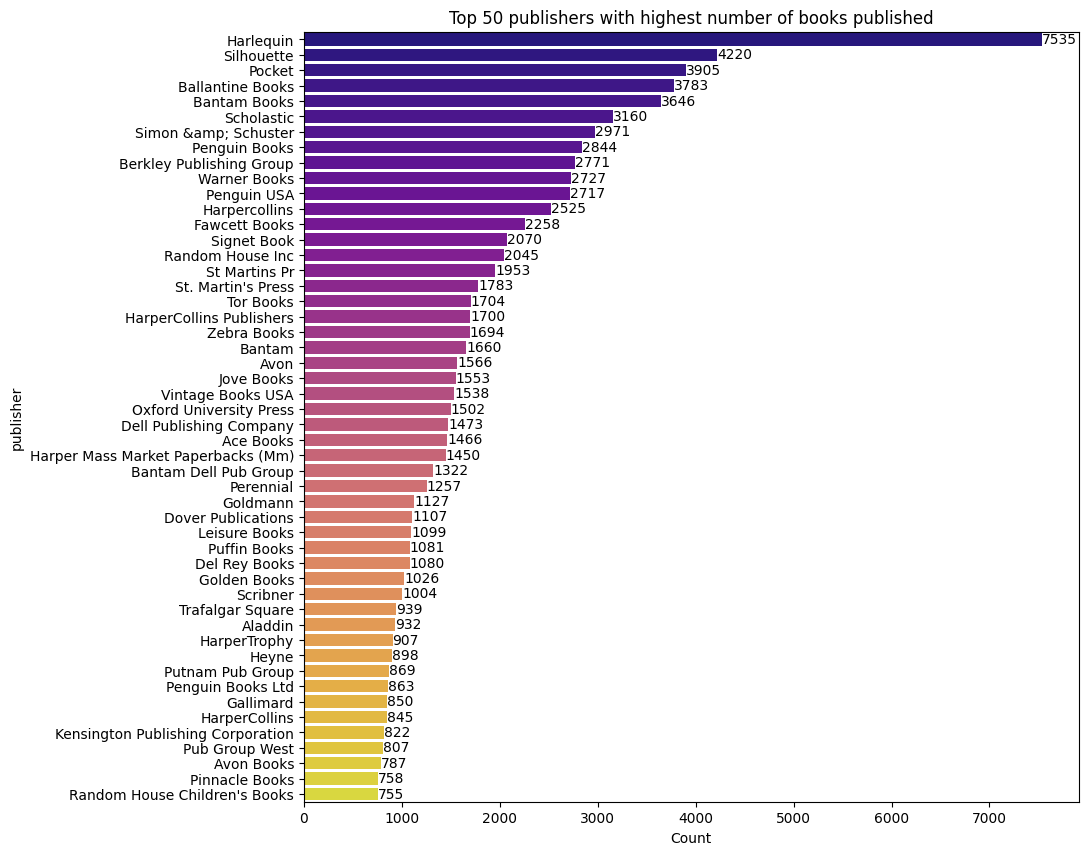

In [100]:
n_categories = 50
title = f"Top {n_categories} publishers with highest number of books published"
plot_top_n_categories_hor(books_df, 'publisher', n=n_categories, percentage=False, title=title, palette='plasma', figsize=(10, 10))

The obtained results show that:
1) The undoubted leader among publishers is 'Harlequin', which has published almost 2 times more books than the publisher 'Silhouette', which is in 2nd place.
2) Each of the top 5 publishers published more than 3,500 books.

### book ratings

#### Create a corresponding dataset

In [103]:
print(f"books_df.duplicated().sum() = {books_df.duplicated().sum()}")
print(f"users_df.duplicated().sum() = {users_df.duplicated().sum()}")
print(f"ratings_df.duplicated().sum() = {ratings_df.duplicated().sum()}")

books_df.duplicated().sum() = 0
users_df.duplicated().sum() = 0
ratings_df.duplicated().sum() = 0


In [106]:
books_df.head(1)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [107]:
ratings_df.head(1)

,user_id,isbn,rating
0,276725,034545104X,0


In [110]:
books_ratings_df = books_df.merge(ratings_df, on='isbn')

print(f"books_df.shape = {books_df.shape}")
print(f"ratings_df.shape = {ratings_df.shape}")
print(f"books_ratings_df.shape = {books_ratings_df.shape}\n")

books_ratings_df.head(3)

books_df.shape = (271360, 8)
ratings_df.shape = (1149780, 3)
books_ratings_df.shape = (1031136, 10)



,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l,user_id,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0


In [128]:
count_avg_books_ratings_df = (
    books_ratings_df
    .drop(['image-url-s', 'image-url-m', 'image-url-l'], axis=1)
    .groupby('isbn')
    ['rating']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(
        columns={
            'count': 'ratings_no',
            'mean': 'avg_rating'
        }
    )
)
count_avg_books_ratings_df.head(3)

,isbn,ratings_no,avg_rating
0,0000913154,1,8.0
1,0001010565,2,0.0
2,0001046438,1,9.0


In [129]:
books_with_rating_scores_df = books_df.merge(count_avg_books_ratings_df, on="isbn")

# Check whether the two datasets have the same number of books (or the same number of isbn)
print(f"len(books_df) = {len(books_df)}")
print(f"len(books_with_rating_scores_df['isbn'].unique()) = {len(books_with_rating_scores_df['isbn'].unique())}")

books_with_rating_scores_df.head(3)

len(books_df) = 271360
len(books_with_rating_scores_df['isbn'].unique()) = 270151


,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l,ratings_no,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000


#### View top-n most highly rated books

In [138]:
rated_books_sorted = books_with_rating_scores_df.sort_values(by=['avg_rating', 'ratings_no'], ascending=False)
rated_books_sorted.head(3)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l,ratings_no,avg_rating
15210,0395193958,The Lord of the Rings (Leatherette Collector's...,J. R. R. Tolkien,1974,Houghton Mifflin Company,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,6,10.0
27455,0760707251,Charlottes Web Special Read Along Edition,E B White,1997,Barnes Noble Books,http://images.amazon.com/images/P/0760707251.0...,http://images.amazon.com/images/P/0760707251.0...,http://images.amazon.com/images/P/0760707251.0...,4,10.0
34242,0689801505,Chimps Don't Wear Glasses,Laura Numeroff Joffe,1995,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689801505.0...,http://images.amazon.com/images/P/0689801505.0...,http://images.amazon.com/images/P/0689801505.0...,4,10.0


For a better understanding, let's consider the books with the highest average rating on a horizontal barplot.

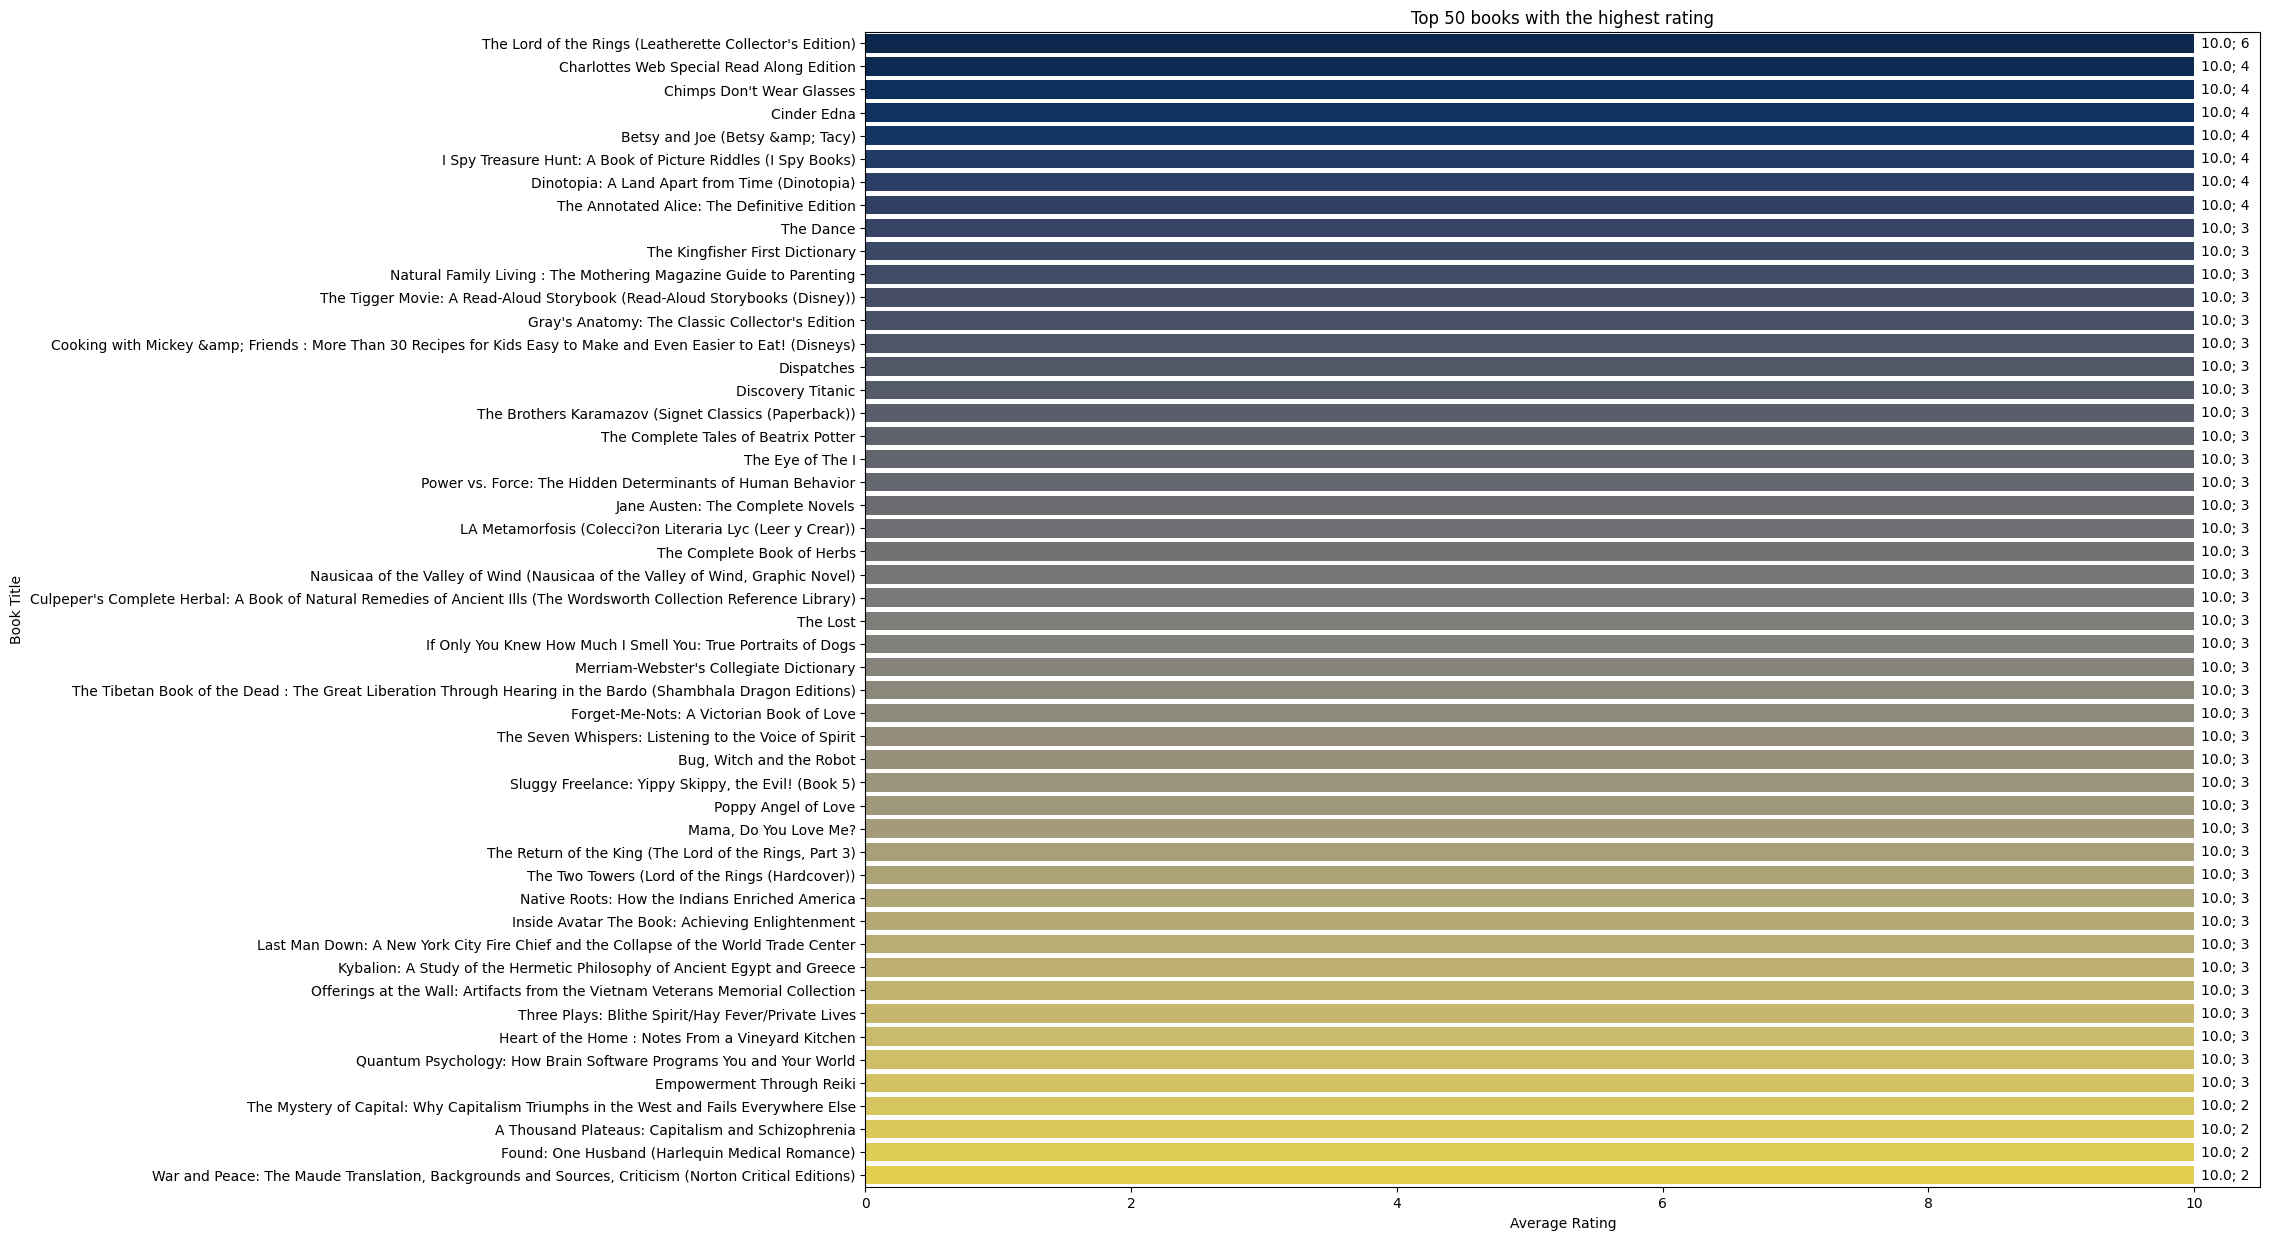

In [145]:
n_books = 50
title = f"Top {n_books} books with the highest rating"

top_rated_books = rated_books_sorted.head(n_books)

# Plotting
# Plotting
plt.figure(figsize=(18, 15))
ax = sns.barplot(x='avg_rating', y='title', data=top_rated_books, palette="cividis")

# Add annotations
for p in ax.patches:
    book_index = top_rated_books.index[ax.patches.index(p)]
    ax.annotate(f'{p.get_width():.1f}; {int(top_rated_books.loc[book_index, "ratings_no"])}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Book Title')
ax.set_title(title)

plt.show()

#### View the distribution of rating scores 

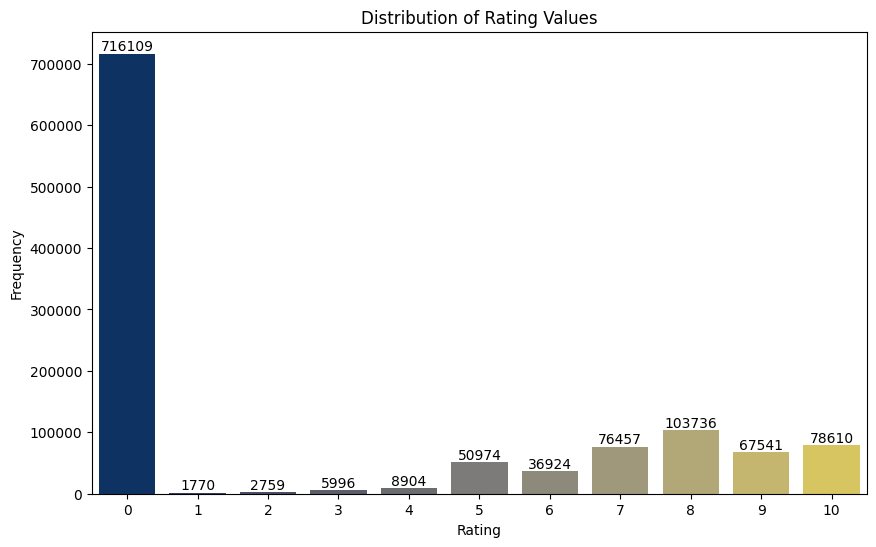

In [146]:
# Plotting the distribution of rating values
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=ratings_df, palette="cividis")

# Add annotations to the rating distribution plot
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rating Values')

plt.show()

The obtained results show that:
1) Most often, readers gave the books the lowest rating (0).
2) Scores 6-10 occur more often in the dataset than 1-5. This shows that users mainly followed the following logic when evaluating books: if they did not like the book - score 0, if they liked the book - score in the range \[5; 10]. That is, in the vast majority of cases, readers gave '0' to books that they did not like, and did not think about intermediate grades 1-5.

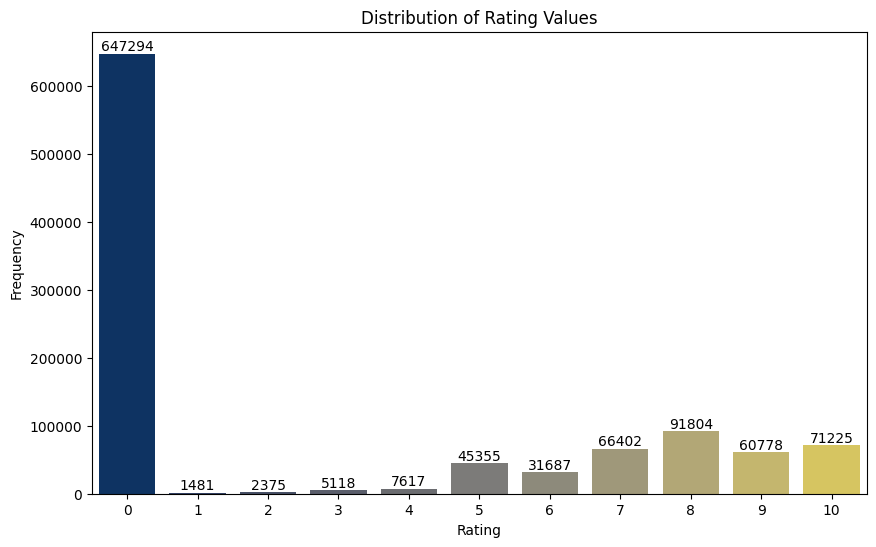

In [149]:
books_ratings_df = books_df.merge(ratings_df, on='isbn')

# Plotting the distribution of rating values
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=books_ratings_df, palette="cividis")

# Add annotations to the rating distribution plot
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rating Values')

plt.show()

For the books_ratings_df dataset, the overall ratio (compared to ratings_df) did not change.

In [150]:
books_with_rating_scores_df.head(2)

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l,ratings_no,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571


In [156]:
result = (
    books_with_rating_scores_df[books_with_rating_scores_df['title']
    .apply(lambda x: 'A Light in the Storm: The Civil War Diary' in x)]
)
result[['isbn', 'title', 'ratings_no', 'avg_rating']]

,isbn,title,ratings_no,avg_rating
35283,0590567330,A Light in the Storm: The Civil War Diary of ...,4,2.25


In [155]:
result = (
    books_with_rating_scores_df[books_with_rating_scores_df['title']
    .apply(lambda x: 'Ask Lily (Young Women of Faith: Lily Series,' in x)]
)
result[['isbn', 'title', 'ratings_no', 'avg_rating']]

,isbn,title,ratings_no,avg_rating
270068,0310232546,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0


In [157]:
result = (
    books_with_rating_scores_df[books_with_rating_scores_df['title']
    .apply(lambda x: 'The Secret Life of Bees' in x)]
)
result[['isbn', 'title', 'ratings_no', 'avg_rating']]

,isbn,title,ratings_no,avg_rating
356,0142001740,The Secret Life of Bees,615,4.219512
9402,096533192X,The Secret Life of Bees,4,2.500000
11907,0670894605,The Secret Life of Bees,96,5.500000
19441,0670032379,The Secret Life of Bees,57,5.070175
137664,0786243066,The Secret Life of Bees,1,10.000000
252613,1565115392,The Secret Life of Bees,1,10.000000


# Save processed datasets in separate files

## books_df

In [30]:
books_df.to_csv('../data/processed_data/Books.csv', index=False)
check_books_df = pd.read_csv('../data/processed_data/Books.csv')

print(f"books_df.shape = {books_df.shape}; check_books_df.shape = {check_books_df.shape}")
check_books_df.head(3)

books_df.shape = (271360, 8); check_books_df.shape = (271360, 8)


,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [31]:
missing_info_df = pd.DataFrame({
    'missing_count': check_books_df.isnull().sum(),
    'missing_percentage': (check_books_df.isnull().sum() / len(check_books_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,isbn,0,0.000000
1,title,0,0.000000
2,author,0,0.000000
3,publication_year,0,0.000000
4,publisher,2,0.000737
5,image-url-s,0,0.000000
6,image-url-m,0,0.000000
7,image-url-l,0,0.000000


In [32]:
check_books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   isbn              271360 non-null  object
 1   title             271360 non-null  object
 2   author            271360 non-null  object
 3   publication_year  271360 non-null  int64 
 4   publisher         271358 non-null  object
 5   image-url-s       271360 non-null  object
 6   image-url-m       271360 non-null  object
 7   image-url-l       271360 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [33]:
# Convert the 'publication_year' column to strings
check_books_df['publication_year'] = check_books_df['publication_year'].astype(str)

# Identify records where 'publication_year' is not an integer
non_integer_records = check_books_df[~check_books_df['publication_year'].str.isdigit()]
print(f"len(non_integer_records) = {len(non_integer_records)}")

len(non_integer_records) = 0


In [34]:
books_df[books_df['publication_year'] > date.today().year]

,isbn,title,author,publication_year,publisher,image-url-s,image-url-m,image-url-l


## users_df

In [70]:
users_df.to_csv('../data/processed_data/Users.csv', index=False)
check_users_df = pd.read_csv('../data/processed_data/Users.csv')

print(f"users_df.shape = {users_df.shape}; check_users_df.shape = {check_users_df.shape}")
check_users_df.head(3)

users_df.shape = (278858, 3); check_users_df.shape = (278858, 3)


,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [71]:
missing_info_df = pd.DataFrame({
    'missing_count': check_users_df.isnull().sum(),
    'missing_percentage': (check_users_df.isnull().sum() / len(check_users_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,user_id,0,0.000000
1,location,0,0.000000
2,age,110762,39.719857


## ratings_df

In [73]:
ratings_df.to_csv('../data/processed_data/Ratings.csv', index=False)
check_ratings_df = pd.read_csv('../data/processed_data/Ratings.csv')

print(f"ratings_df.shape = {ratings_df.shape}; check_ratings_df.shape = {check_ratings_df.shape}")
check_ratings_df.head(3)

ratings_df.shape = (1149780, 3); check_ratings_df.shape = (1149780, 3)


,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [74]:
missing_info_df = pd.DataFrame({
    'missing_count': check_ratings_df.isnull().sum(),
    'missing_percentage': (check_ratings_df.isnull().sum() / len(check_ratings_df)) * 100
}).reset_index().rename(columns={'index': 'column'})

missing_info_df

,column,missing_count,missing_percentage
0,user_id,0,0.0
1,isbn,0,0.0
2,rating,0,0.0
